# Basic Deep Learning - Diabetes

# Prepare Library

In [ ]:
import numpy as np
import pandas as pd               # mengolah dataframe, pertemuan minggu ke 4
import matplotlib.pyplot as plt   # visualisasi
import seaborn as sns             # visualisasi

from sklearn.model_selection import train_test_split  # kita gunakan untuk memecah dataset

# deep learning framework: KERAS
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
plt.style.use('seaborn')

# Load Dataset

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

--2022-03-09 06:15:13--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0s      

2022-03-09 06:15:13 (133 MB/s) - ‘pima-indians-diabetes.data.csv’ saved [23278/23278]



In [ ]:
!ls

pima-indians-diabetes.data.csv	sample_data


In [ ]:
cols_name = ['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class']

In [ ]:
df_diabetes = pd.read_csv('pima-indians-diabetes.data.csv', names=cols_name) 

In [ ]:
df_diabetes.head(10) # ini digunakan untuk mengetahui 5 data/record tertas

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df_diabetes.tail() # untuk menampilkan data / record dari paling bawah

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df_diabetes.sample(5)  # untuk menampilkan data/record secara acak

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
89,1,107,68,19,0,26.5,0.165,24,0
151,4,114,65,0,0,21.9,0.432,37,0
300,0,167,0,0,0,32.3,0.839,30,1
114,7,160,54,32,175,30.5,0.588,39,1
568,4,154,72,29,126,31.3,0.338,37,0


In [ ]:
df_diabetes.shape

(768, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


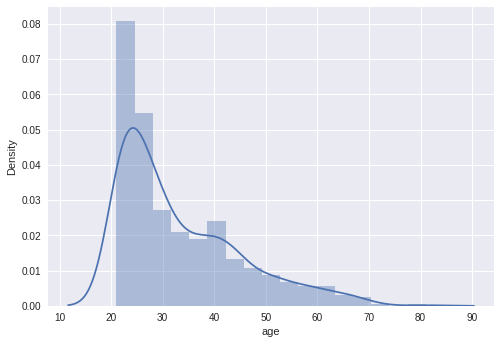

In [ ]:
# visualiasi standart

sns.distplot(df_diabetes['age'])

# Split Dataset



In [ ]:
features = df_diabetes.values[:,:8]  # kita melakukan slicing dataset terhadap fitur yang akan kita gunakan

In [ ]:
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
labels = df_diabetes.values[:,8:]

In [ ]:
labels

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
# X = Features
# y = target/class

# Kita perlu data latih, label latih, data uji, label uji

# random_state itu angka bebas, inisiasi pembagian.

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=20)

In [ ]:
print('jumlah data latih', X_train.shape)
print('jumlah data uji', X_test.shape)

print('jumlah label latih', y_train.shape)
print('jumlah label uji', y_test.shape)

jumlah data latih (576, 8)
jumlah data uji (192, 8)
jumlah label latih (576, 1)
jumlah label uji (192, 1)


# Define Model

In [ ]:
# define Keras Sequential Model untuk membangun arstitektur deep learning sederhana

model = Sequential()

In [ ]:
# menentukan layer dari model
model.add(Dense(12, input_dim=8, activation='relu'))    # add input layer + 1st hidden layer
model.add(Dense(8, activation='relu'))                  # add 2nd hidden layer
model.add(Dense(1, activation='sigmoid'))               # output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# Compile Model

In [ ]:
# Kita bungkus model kita ..
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model

In [ ]:
# Kita akan fit kan data kita ke model yang telah kita compile
# batch_size -> kita akan mencacah data berapa kali dalam 1 kali iterasi
# epoch -> berapa kali kita akan menjalankan si model

model.fit(X_train, y_train, epochs=300, batch_size=8)

Epoch 1/300
72/72 [==============================] - 4s 3ms/step - loss: 4.7831 - accuracy: 0.5451
Epoch 2/300
72/72 [==============================] - 0s 3ms/step - loss: 1.4414 - accuracy: 0.5243
Epoch 3/300
72/72 [==============================] - 0s 3ms/step - loss: 0.9885 - accuracy: 0.5677
Epoch 4/300
72/72 [==============================] - 0s 3ms/step - loss: 0.8356 - accuracy: 0.5903
Epoch 5/300
72/72 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.6024
Epoch 6/300
72/72 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.6250
Epoch 7/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6354
Epoch 8/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6632
Epoch 9/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.6840
Epoch 10/300
72/72 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.6910
Epoch 11/

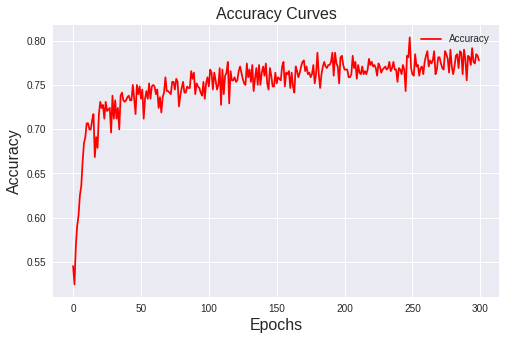

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Accuracy'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

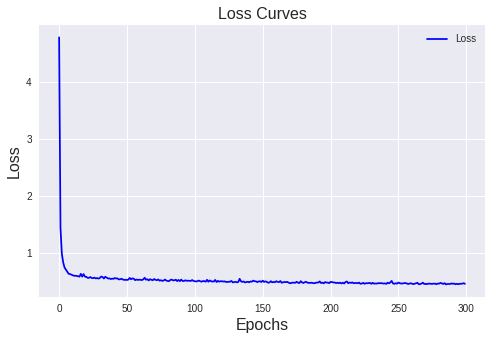

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['loss'], 'b')
plt.legend(['Loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.show()

In [ ]:
# evaluate the keras model
# Uji si model dengan data uji ..

_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 73.96
